# Proyecto 1

Natalia Isabel Padilla Terrones 
Lorena Patricia Barrera Rodríguez 164694

## Preguntas

### 1. ¿Cuál es la variable target?

La variable target es **churn** o **no churn**, es decir que el objetivo del modelo es si el cliente abandonará la empresa o seguirá siendo cliente. En este caso, un *positivo verdadero* (TP) es si el modelo detecta que un cliente va a churnear y, efectivamente, churnea; un *negativo verdadero* (TN) es si el modelo detecta que un cliente no va a churnear y, efectivamente, no churnea; un *falso positivo* (FP) es si el modelo detecta que un cliente va a churnear, pero al final no lo hace; y finalmente, un *falso negativo* (FN) es si el modelo detecta que un cliente no va a churnear, pero al final sí lo hace.
Para esa situación, es preferible minimizar los falsos negativos porque son los casos que más pueden "afectar" a la empresa ya que con los FP la empresa no pierde clientes y con los FN sí. Para poder cumplir con lo dicho anteriormente, y de acuerdo al contexto del problema, la métrica que se necesita optimizar es el *recall*.


### 2. Genera el data profiling de las variables totalcharges y la variable contract interpreta la salida.



In [1]:
import pandas as pd
import numpy as np

/Users/lorenabarrera/.pyenv/versions/itam_md/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Se lee la base de datos
empresa = pd.read_csv('/Users/lorenabarrera/Documents/Minería de Datos/Telco-Customer-Churn.csv', sep=',')
#empresa.rename(columns={'LugarMuerte': 'lugar_muerte'},
 #            inplace=True)

In [3]:
empresa.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
empresa.rename(columns={'customerID': 'customer_id', 'SeniorCitizen':'senior_citizen', 
                        'Partner':'partner', 'Dependents':'dependents', 'PhoneService':'phone_service',
                        'MultipleLines':'multiple_lines', 'InternetService':'internet_service',
                        'OnlineSecurity':'online_security', 'OnlineBackup':'online_backup',
                        'DeviceProtection':'device_protection', 'TechSupport':'tech_support',
                        'StreamingTV':'streaming_tv', 'StreamingMovies':'streaming_movies',
                        'Contract':'contract', 'PaperlessBilling':'paperless_billing', 
                        'PaymentMethod':'payment_method', 'MonthlyCharges':'monthly_charges',
                        'TotalCharges':'total_charges', 'Churn':'churn'}, inplace=True)


In [5]:
empresa.customer_id.count()

7043

In [6]:
empresa.replace(' ', np.nan, inplace = True)
empresa.dropna(inplace = True)
empresa.reset_index(drop=True, inplace=True)
empresa.customer_id.count()

7032

In [7]:
print(empresa.total_charges.dtypes)
print(empresa.contract.dtypes)

object
object


## Preprocesamiento

Cambia las variables gender, seniorcitizen, partner, phoneservice, paperlessbilling y churn a variables binarias con valor posible 0 para el caso No y 1 para el caso Yes.

In [8]:
empresa

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
# Cambia los "Yes" a 1s y los "No" a 0s (Excepto gender en el que "Female" es 1 y "Male" es 0)
empresa["gender"].replace({"Female": 1, "Male": 0}, inplace = True)
empresa["partner"].replace({"Yes": 1, "No": 0}, inplace = True)
empresa["phone_service"].replace({"Yes": 1, "No": 0}, inplace = True)
empresa["paperless_billing"].replace({"Yes": 1, "No": 0}, inplace = True)
empresa["churn"].replace({"Yes": 1, "No": 0}, inplace = True)
empresa["dependents"].replace({"Yes": 1, "No": 0}, inplace = True)

In [10]:
empresa.groupby(['multiple_lines']).count() 

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
multiple_lines,,,,,,,,,,,,,,,,,,,,
No,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385,3385
No phone service,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680
Yes,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967


In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
ohe = OneHotEncoder()
ohe_df = pd.DataFrame()

In [13]:
ohe_var = ["multiple_lines", "internet_service", "online_security", "online_backup", "device_protection", 
           "tech_support", "streaming_tv", "streaming_movies", "contract", "payment_method"]

In [14]:
for i in range(len(ohe_var)):
    columna = ohe_var[i]
    ohe_ = ohe.fit_transform(empresa[columna].values.reshape(-1,1))
    df_ohe = pd.DataFrame(list(ohe_.toarray()), columns = columna + "_" + empresa[columna].unique())
    ohe_df = pd.merge(df_ohe, ohe_df, how="left", left_index = True, right_index = True)

In [15]:
ohe_df

,payment_method_Electronic check,payment_method_Mailed check,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),contract_Month-to-month,contract_One year,contract_Two year,streaming_movies_No,streaming_movies_Yes,streaming_movies_No internet service,...,online_backup_No internet service,online_security_No,online_security_Yes,online_security_No internet service,internet_service_DSL,internet_service_Fiber optic,internet_service_No,multiple_lines_No phone service,multiple_lines_No,multiple_lines_Yes
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7029,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7030,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
empresa = empresa.drop(ohe_var, axis = 1)

In [17]:
empresa = pd.concat([empresa, ohe_df], axis=1)

In [18]:
empresa.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,...,online_backup_No internet service,online_security_No,online_security_Yes,online_security_No internet service,internet_service_DSL,internet_service_Fiber optic,internet_service_No,multiple_lines_No phone service,multiple_lines_No,multiple_lines_Yes
0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.5,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Transforma las variables a una codificación de one hot encoding: multiplelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, paymentmethod.

In [19]:
empresa.count()

customer_id                                 7032
gender                                      7032
senior_citizen                              7032
partner                                     7032
dependents                                  7032
tenure                                      7032
phone_service                               7032
paperless_billing                           7032
monthly_charges                             7032
total_charges                               7032
churn                                       7032
payment_method_Electronic check             7032
payment_method_Mailed check                 7032
payment_method_Bank transfer (automatic)    7032
payment_method_Credit card (automatic)      7032
contract_Month-to-month                     7032
contract_One year                           7032
contract_Two year                           7032
streaming_movies_No                         7032
streaming_movies_Yes                        7032
streaming_movies_No 

## Modelado

In [67]:
np.random.seed(210418)

In [68]:
y = empresa.churn
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: churn, Length: 7032, dtype: int64

In [69]:
## Se quita la columna churn (es el target) y customer_id (causa conflicto en el árbol)
X = empresa.drop(['churn', 'customer_id'], axis = 1)
X

,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,payment_method_Electronic check,...,online_backup_No internet service,online_security_No,online_security_Yes,online_security_No internet service,internet_service_DSL,internet_service_Fiber optic,internet_service_No,multiple_lines_No phone service,multiple_lines_No,multiple_lines_Yes
0,1,0,1,0,1,0,1,29.85,29.85,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,34,1,0,56.95,1889.5,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,2,1,1,53.85,108.15,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,0,45,0,0,42.30,1840.75,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,2,1,1,70.70,151.65,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,24,1,1,84.80,1990.5,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,1,0,1,1,72,1,1,103.20,7362.9,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7029,1,0,1,1,11,0,1,29.60,346.45,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7030,0,1,1,0,4,1,1,74.40,306.6,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [70]:
## separando en train, test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## verificando los tamaños de nuestros 4 sets
print("entrenamiento: X: {}, y: {}".format(X_train.shape, y_train.shape))
print("prueba: X: {}, y: {}".format(X_test.shape, y_test.shape))

entrenamiento: X: (5274, 40), y: (5274,)
prueba: X: (1758, 40), y: (1758,)


In [71]:
## Configuración del Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

# n_estimators corresponde al número de árboles que queremos crear: 'n_estimators': [300, 500, 800, 1000],
grid = {'n_estimators': [1], 'random_state': [5432], 'max_depth': [5, 7, 11], 'min_samples_leaf': [7, 9, 11, 13], 
        'criterion':['gini','entropy'] }

rf = RandomForestClassifier(oob_score=True, n_jobs=-1)
gs_rf = GridSearchCV(rf, grid, cv=5, scoring='recall', return_train_score=True, n_jobs=-1)

start = time.time()
# entrenando los random forest
gs_rf.fit(X_train, y_train)
print("tiempo de ejecución en segundos: {}".format(time.time() - start))

tiempo de ejecución en segundos: 14.307014226913452


/Users/lorenabarrera/.pyenv/versions/itam_md/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/lorenabarrera/.pyenv/versions/itam_md/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Se generan 24 modelos, es decir que se genera un modelo por cada combinación posible entre los parámetros dados. Por lo tanto: 1 x 1 x 3 x 4 x 2 = 24 modelos.

In [72]:
# mejor configuración 
importancias = gs_rf.best_estimator_.feature_importances_
importancias

array([0.00000000e+00, 1.07417938e-02, 2.69602652e-03, 0.00000000e+00,
       3.05566435e-02, 1.11771984e-05, 7.41650832e-03, 1.52345681e-01,
       1.90973234e-01, 5.85248887e-04, 5.17627632e-04, 1.02583229e-02,
       1.61484044e-03, 3.83476415e-03, 1.33088842e-02, 1.49145318e-01,
       1.41869273e-04, 0.00000000e+00, 4.29207237e-03, 3.60917398e-03,
       0.00000000e+00, 0.00000000e+00, 3.26547896e-02, 3.26290536e-03,
       4.77429780e-03, 1.04000417e-02, 0.00000000e+00, 0.00000000e+00,
       1.14955750e-02, 0.00000000e+00, 3.88426708e-03, 3.03482066e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.76273379e-02,
       1.72866471e-02, 3.08288572e-03, 0.00000000e+00, 0.00000000e+00])

In [93]:
# Índices de los más importantes (están ordenados de menor a mayor)
imp_3 = np.argsort(importancias)[[-1, -2, -3]]
imp_3

array([31,  8,  7])

Las tres variables más importantes para la predicción son si no contrataron un servicio de seguridad online (online_security_No), el total de cargos y el tiempo de contrato

## AGREGAR PROCENTAJES!!

In [94]:
X.columns[imp_3]

Index(['online_security_No', 'total_charges', 'monthly_charges'], dtype='object')

In [95]:
importancias[imp_3]

array([0.30348207, 0.19097323, 0.15234568])

In [76]:
# Variables que no importan
no_imp = np.where(importancias < 0.01)
no_imp

(array([ 0,  2,  3,  5,  6,  9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 23, 24,
        26, 27, 29, 30, 32, 33, 34, 37, 38, 39]),)

In [77]:
var_no_imp = X.columns[no_imp]
var_no_imp

Index(['gender', 'partner', 'dependents', 'phone_service', 'paperless_billing',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'payment_method_Credit card (automatic)', 'contract_Month-to-month',
       'streaming_movies_No', 'streaming_movies_Yes',
       'streaming_movies_No internet service', 'streaming_tv_No',
       'streaming_tv_Yes', 'streaming_tv_No internet service',
       'tech_support_Yes', 'tech_support_No internet service',
       'device_protection_Yes', 'device_protection_No internet service',
       'online_backup_No', 'online_backup_No internet service',
       'online_security_Yes', 'online_security_No internet service',
       'internet_service_DSL', 'multiple_lines_No phone service',
       'multiple_lines_No', 'multiple_lines_Yes'],
      dtype='object')

In [78]:
X_train = X_train.drop(var_no_imp, axis = 1)
X_test = X_test.drop(var_no_imp, axis = 1)

In [79]:
X_train.head()

,senior_citizen,tenure,monthly_charges,total_charges,payment_method_Bank transfer (automatic),contract_One year,contract_Two year,tech_support_No,device_protection_No,online_backup_Yes,online_security_No,internet_service_Fiber optic,internet_service_No
5512,0,59,64.65,3735.45,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6471,0,13,53.45,718.1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
615,0,8,25.25,186.3,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2521,0,1,19.40,19.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
571,0,11,64.90,697.25,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


No se vuelve a hacer un X_train y X_test porque los grupos se modificarían

## CONTESTAR!!

In [88]:
# n_estimators corresponde al número de árboles que queremos crear: 
grid = {'random_state': [7654], 'max_depth': [11, 13, 15], 'n_estimators': [500, 800, 1000], 
        'min_samples_leaf': [11, 13], 'criterion':['gini','entropy'] }

rf = RandomForestClassifier(oob_score=True, n_jobs=-1)
gs_rf = GridSearchCV(rf, grid, cv=5, scoring='recall', return_train_score=True, n_jobs=-1)

start = time.time()
# entrenando los random forest
gs_rf.fit(X_train, y_train)
print("tiempo de ejecución en segundos: {}".format(time.time() - start))

tiempo de ejecución en segundos: 486.32927107810974


Se generan 36 modelos, es decir que se genera un modelo por cada combinación posible entre los parámetros dados. Por lo tanto: 1 x 3 x 3 x 2 x 2 = 36 modelos.

In [96]:
# mejor configuración 
importancias_rf = gs_rf.best_estimator_.feature_importances_
importancias_rf

array([0.01058888, 0.19137702, 0.12455522, 0.15556834, 0.04538903,
       0.0425809 , 0.10888585, 0.08786886, 0.01718693, 0.02730141,
       0.09334746, 0.08444602, 0.01090408])

In [97]:
# Índice del más importantes (están ordenados de menor a mayor)
imp = np.argsort(importancias_rf)[-1]
imp

1

In [98]:
X_train.columns[imp]

'tenure'

In [99]:
importancias_rf[imp]

0.19137701598294882

Los mejores hiperparámetros para el modelo son:

In [100]:
# mejor configuración 
gs_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=11,
                       n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=7654)

### Predicción

In [101]:
# predicciones con el mejor predictor 
predicted_labels = gs_rf.predict(X_test)
predicted_labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [102]:
# predicciones en score con el mejor predictor
predicted_scores = gs_rf.predict_proba(X_test)
predicted_scores[:10]

array([[0.96862918, 0.03137082],
       [0.93928805, 0.06071195],
       [0.91360181, 0.08639819],
       [0.99027042, 0.00972958],
       [0.92553951, 0.07446049],
       [0.94806406, 0.05193594],
       [0.9441916 , 0.0558084 ],
       [0.462827  , 0.537173  ],
       [0.63712318, 0.36287682],
       [0.35594067, 0.64405933]])

### ROC

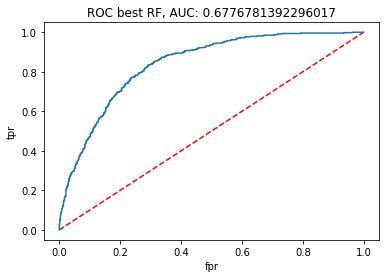

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, predicted_scores[:,1], pos_label=1)

plt.clf()
plt.plot([0,1],[0,1], 'k--', c="red")
plt.plot(fpr, tpr)
plt.title("ROC best RF, AUC: {}".format(roc_auc_score(y_test, predicted_labels)))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [104]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicted_labels)

array([[1169,  114],
       [ 264,  211]])

In [107]:
#### Precision, recall, thresholds
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_2 = precision_recall_curve(y_test, predicted_scores[:,1], pos_label=1)
thresholds_2 = np.append(thresholds_2, 1)
(precision.shape, recall.shape, thresholds_2.shape)

((1691,), (1691,), (1691,))

In [108]:
def get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2):
    df_1 = pd.DataFrame({'threshold': thresholds_2,'precision': precision,
                    'recall': recall})
    df_1['f1_score'] = 2 * (df_1.precision * df_1.recall) / (df_1.precision + df_1.recall)
    
    df_2 = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': thresholds})
    df_2['tnr'] = 1 - df_2['fpr']
    df_2['fnr'] = 1 - df_2['tpr']
    
    df = df_1.merge(df_2, on="threshold")
    
    return df

In [109]:
metrics_report = get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2)
metrics_report

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
0,0.002970,0.277778,1.000000,0.434783,1.000000,0.962588,0.037412,0.000000
1,0.003049,0.277355,0.997895,0.434066,0.997895,0.962588,0.037412,0.002105
2,0.004787,0.281640,0.997895,0.439296,0.997895,0.942323,0.057677,0.002105
3,0.004875,0.281975,0.997895,0.439703,0.997895,0.940764,0.059236,0.002105
4,0.004926,0.282479,0.997895,0.440316,0.997895,0.938426,0.061574,0.002105
...,...,...,...,...,...,...,...,...
511,0.868057,0.875000,0.029474,0.057026,0.029474,0.001559,0.998441,0.970526
512,0.875197,0.933333,0.029474,0.057143,0.029474,0.000779,0.999221,0.970526
513,0.886464,0.916667,0.023158,0.045175,0.023158,0.000779,0.999221,0.976842
514,0.887735,1.000000,0.023158,0.045267,0.023158,0.000000,1.000000,0.976842


In [111]:
negocio = metrics_report[metrics_report.fpr <= 0.02]
negocio

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
476,0.689313,0.771429,0.170526,0.279310,0.170526,0.018706,0.981294,0.829474
477,0.701520,0.764706,0.164211,0.270364,0.164211,0.018706,0.981294,0.835789
478,0.704529,0.780000,0.164211,0.271304,0.164211,0.017147,0.982853,0.835789
479,0.711783,0.765957,0.151579,0.253076,0.151579,0.017147,0.982853,0.848421
480,0.712242,0.774194,0.151579,0.253521,0.151579,0.016368,0.983632,0.848421
481,0.714176,0.769231,0.147368,0.247350,0.147368,0.016368,0.983632,0.852632
482,0.718190,0.795455,0.147368,0.248668,0.147368,0.014030,0.985970,0.852632
483,0.723862,0.775000,0.130526,0.223423,0.130526,0.014030,0.985970,0.869474
484,0.724918,0.784810,0.130526,0.223827,0.130526,0.013250,0.986750,0.869474
485,0.727146,0.773333,0.122105,0.210909,0.122105,0.013250,0.986750,0.877895
